In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import statsmodels.api as sm

C:\Users\Trader\anaconda3\envs\iod_dl\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [4]:
import yfinance as yf
from yahoofinancials import YahooFinancials

In [5]:
df = yf.download('MSFT', 
                      start='2008-01-01', 
                      end='2018-04-01', 
                      progress=False, 
                      interval='1mo'
)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-01,35.790001,35.959999,31.040001,32.599998,24.106819,1.950302e+09
2008-02-01,31.059999,33.250000,27.020000,27.200001,20.113663,2.324581e+09
2008-02-19,NaN,NaN,NaN,NaN,NaN,NaN
2008-03-01,27.240000,29.590000,26.870001,28.379999,21.067783,1.452390e+09
2008-04-01,28.830000,32.099998,27.930000,28.520000,21.171713,1.444720e+09


In [6]:
df.drop(['Open','High','Low','Adj Close','Volume'],axis=1,inplace=True)
df.head()

,Close
Date,
2008-01-01,32.599998
2008-02-01,27.200001
2008-02-19,NaN
2008-03-01,28.379999
2008-04-01,28.520000


In [7]:
df.dropna(subset=['Close'],inplace=True)
df.head()

,Close
Date,
2008-01-01,32.599998
2008-02-01,27.200001
2008-03-01,28.379999
2008-04-01,28.520000
2008-05-01,28.320000


In [8]:
df.tail()

,Close
Date,
2017-11-01,84.169998
2017-12-01,85.540001
2018-01-01,95.010002
2018-02-01,93.769997
2018-03-01,91.269997


In [9]:
df.index

DatetimeIndex(['2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01',
               '2008-05-01', '2008-06-01', '2008-07-01', '2008-08-01',
               '2008-09-01', '2008-10-01',
               ...
               '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01',
               '2017-10-01', '2017-11-01', '2017-12-01', '2018-01-01',
               '2018-02-01', '2018-03-01'],
              dtype='datetime64[ns]', name='Date', length=123, freq=None)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Close,123.0,39.69065,17.916175,16.15,26.68,32.02,48.225,95.010002


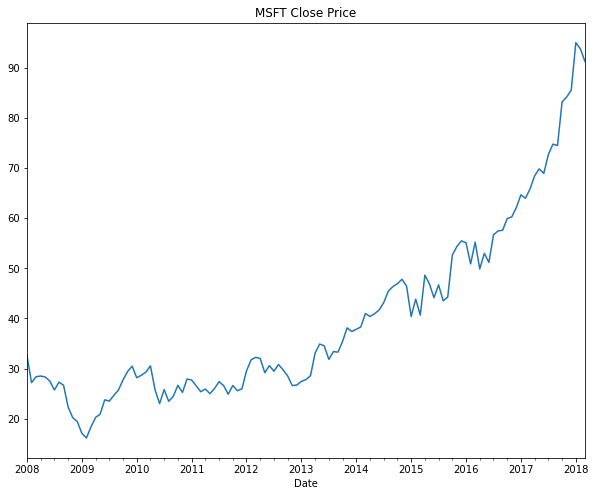

In [77]:
df['Close'].plot(figsize=(10,8))
plt.title('MSFT Close Price');
plt.savefig('msft_plot.png')

In [12]:
time_series = df['Close']

In [13]:
type(time_series)

pandas.core.series.Series

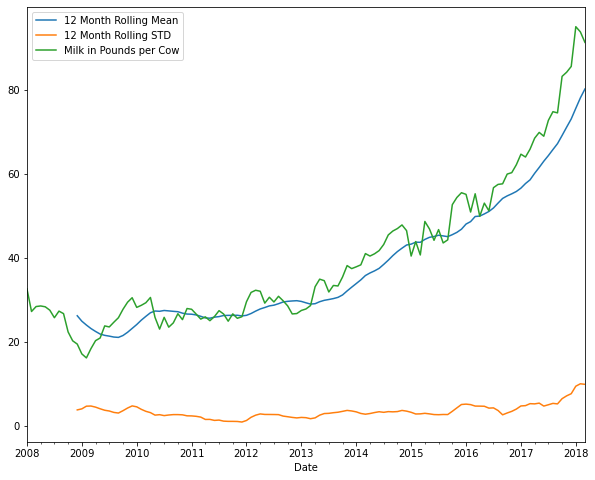

In [79]:
time_series.rolling(12).mean().plot(label='12 Month Rolling Mean',figsize=(10,8))
time_series.rolling(12).std().plot(label='12 Month Rolling STD')
time_series.plot(label='Milk in Pounds per Cow')
plt.legend();
plt.savefig('rolling.png')

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [16]:
decomp = seasonal_decompose(time_series)

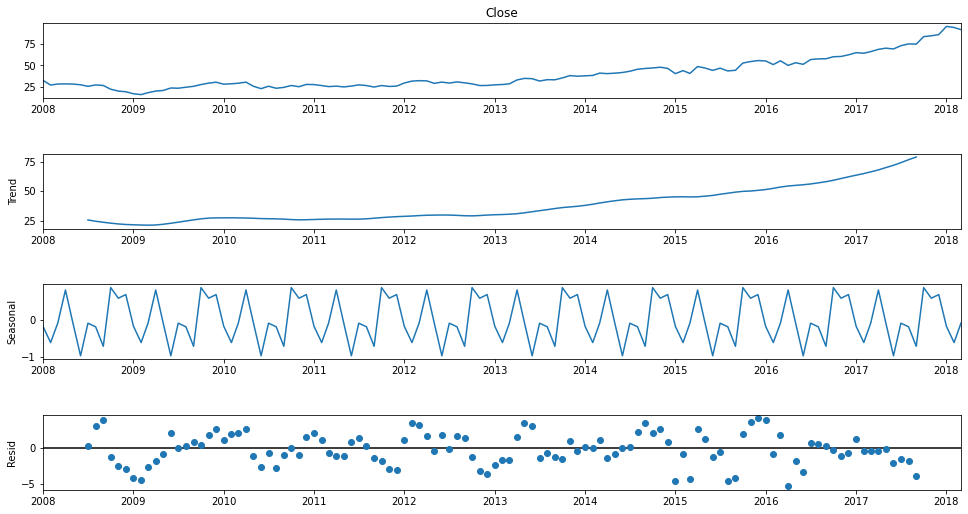

In [78]:
fig=decomp.plot()
fig.set_size_inches(15,8)
plt.savefig('decomp.png')

In [18]:
df.head()

,Close
Date,
2008-01-01,32.599998
2008-02-01,27.200001
2008-03-01,28.379999
2008-04-01,28.520000
2008-05-01,28.320000


### Dicky Fuller Test
Test if data is stationary or not

In [19]:
from statsmodels.tsa.stattools import adfuller

In [20]:
result = adfuller(df['Close'])

In [21]:
result

(2.750252872517292,
 1.0,
 5,
 117,
 {'1%': -3.487517288664615,
  '5%': -2.8865777180380032,
  '10%': -2.5801239192052012},
 511.45005169551496)

In [22]:
def adf_check(time_series):
    
    result=adfuller(time_series)
    print(" Augmented Dicky-Fuller Test")
    labels = ['ADF Test Statistic','p-value','# of lags','Num of Obseravtions used']
    
    for value,label in zip(result,labels):
        print(label+" : "+str(value))
        
    if result[1]<=0.05:
        print("Strong evidence against null hypothesis")
        print("Reject null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis")
        print("Fail to reject null hypothesis")
        print("Data has a unit root, it is non-stationary")

In [23]:
adf_check(df['Close'])

 Augmented Dicky-Fuller Test
ADF Test Statistic : 2.750252872517292
p-value : 1.0
# of lags : 5
Num of Obseravtions used : 117
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root, it is non-stationary


In [24]:
df['First Difference'] = df['Close'] - df['Close'].shift(1)

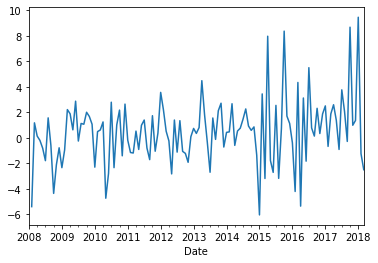

In [25]:
df['First Difference'].plot();

In [26]:
adf_check(df['First Difference'].dropna())

 Augmented Dicky-Fuller Test
ADF Test Statistic : -12.631971386532946
p-value : 1.4980066787853586e-23
# of lags : 0
Num of Obseravtions used : 121
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root and is stationary


In [27]:
df['Second Difference'] = df['First Difference'] - df['First Difference'].shift(1)

In [28]:
adf_check(df['Second Difference'].dropna())

 Augmented Dicky-Fuller Test
ADF Test Statistic : -5.559573147293065
p-value : 1.5528256993515563e-06
# of lags : 13
Num of Obseravtions used : 107
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root and is stationary


<AxesSubplot:xlabel='Date'>

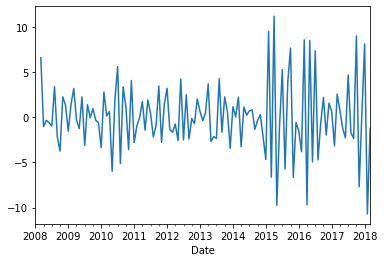

In [29]:
df['Second Difference'].plot()

#### The above shows the data is stationary as p-value is < 0.05
The below is just to show in case we need a second difference

In [30]:
df['Seasonal Difference'] = df['Close'] - df['Close'].shift(12)

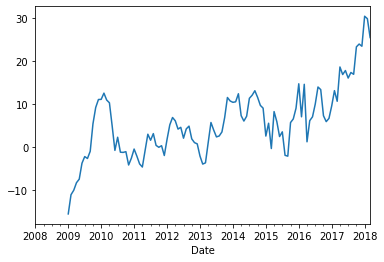

In [31]:
df['Seasonal Difference'].plot();

In [32]:
adf_check(df['Seasonal Difference'].dropna())

 Augmented Dicky-Fuller Test
ADF Test Statistic : 0.6072215326444844
p-value : 0.9877922815482505
# of lags : 12
Num of Obseravtions used : 98
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root, it is non-stationary


In [33]:
df['Seasonal First Difference'] = df['First Difference'] - df['First Difference'].shift(12)

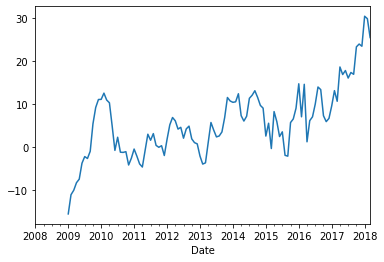

In [34]:
df['Seasonal Difference'].plot();

In [35]:
adf_check(df['Seasonal First Difference'].dropna())

 Augmented Dicky-Fuller Test
ADF Test Statistic : -5.357941273728558
p-value : 4.148830835076247e-06
# of lags : 11
Num of Obseravtions used : 98
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root and is stationary


In [36]:
df['Seasonal Second Difference'] = df['Second Difference'] - df['Second Difference'].shift(12)

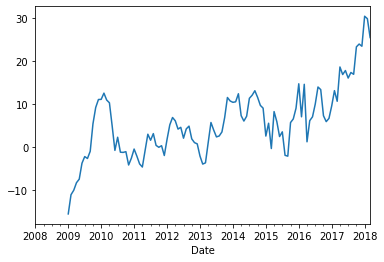

In [37]:
df['Seasonal Difference'].plot();

In [85]:
adf_check(df['Seasonal Second Difference'].dropna())

 Augmented Dicky-Fuller Test
ADF Test Statistic : -4.682747320246507
p-value : 9.06621394641067e-05
# of lags : 13
Num of Obseravtions used : 95
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root and is stationary


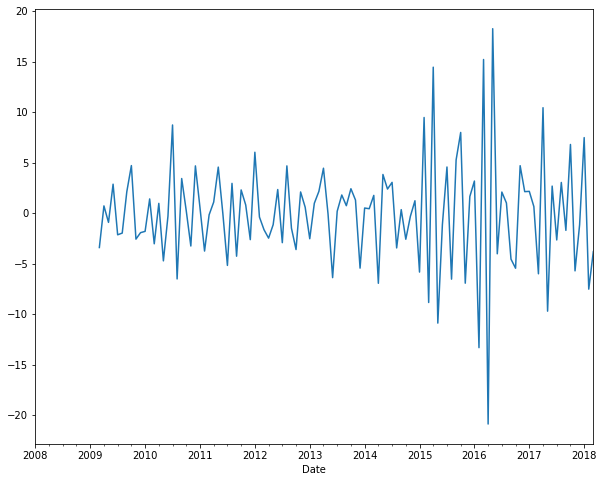

In [82]:
df['Seasonal Second Difference'].plot(figsize=(10,8))
plt.savefig('difference.png')

In [39]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

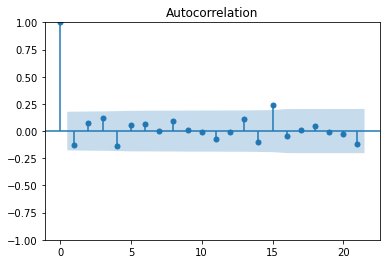

In [40]:
fig_first = plot_acf(df['First Difference'].dropna())

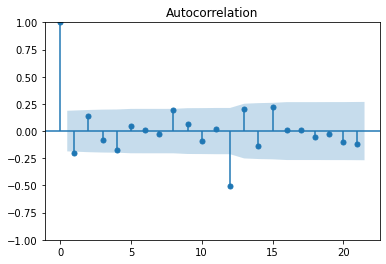

In [41]:
fig_seasonal_first = plot_acf(df['Seasonal First Difference'].dropna())

C:\Users\Trader\anaconda3\envs\iod_dl\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


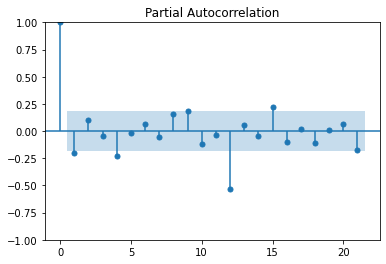

In [42]:
result = plot_pacf(df['Seasonal First Difference'].dropna())

C:\Users\Trader\anaconda3\envs\iod_dl\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


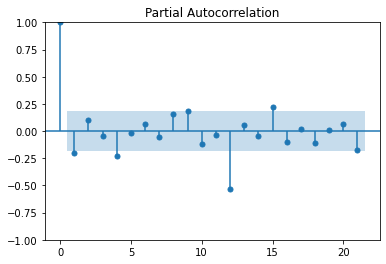

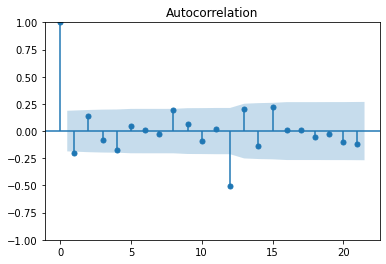

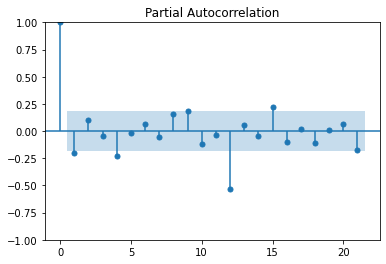

In [43]:
plot_acf(df['Seasonal First Difference'].dropna())
plot_pacf(df['Seasonal First Difference'].dropna())

In [44]:
from statsmodels.tsa.arima_model import ARIMA

In [45]:
help(ARIMA)

Help on class ARIMA in module statsmodels.tsa.arima_model:

class ARIMA(ARMA)
 |  ARIMA(*args, **kwargs)
 |  
 |  ARIMA has been deprecated in favor of the new implementation
 |  
 |  See Also
 |  --------
 |  statsmodels.tsa.arima.model.ARIMA
 |      ARIMA models with a variety of parameter estimators
 |  statsmodels.tsa.statespace.SARIMAX
 |      SARIMAX models estimated using MLE
 |  
 |  Method resolution order:
 |      ARIMA
 |      ARMA
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors inherited from ARMA:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [46]:
model = sm.tsa.statespace.SARIMAX(df['Close'],order=(0,1,0),seasonal_order=(1,1,1,12))

C:\Users\Trader\anaconda3\envs\iod_dl\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Trader\anaconda3\envs\iod_dl\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [47]:
results = model.fit()

In [48]:
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                  123
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -273.390
Date:                              Mon, 18 Apr 2022   AIC                            552.781
Time:                                      14:20:40   BIC                            560.882
Sample:                                  01-01-2008   HQIC                           556.067
                                       - 03-01-2018                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.1163      0.141     -0.824      0.410      -0.393       0.160
ma.S.L12      -0.68

In [49]:
results.resid

Date
2008-01-01    32.599998
2008-02-01    -5.399998
2008-03-01     1.179998
2008-04-01     0.140001
2008-05-01    -0.200001
                ...    
2017-11-01     0.289246
2017-12-01     0.862622
2018-01-01     9.941681
2018-02-01    -0.687671
2018-03-01    -3.893818
Length: 123, dtype: float64

<AxesSubplot:xlabel='Date'>

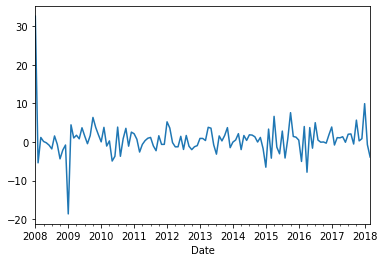

In [50]:
results.resid.plot()

<AxesSubplot:ylabel='Density'>

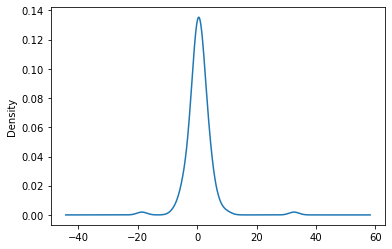

In [51]:
results.resid.plot(kind='kde')

In [52]:
df.shape

(123, 6)

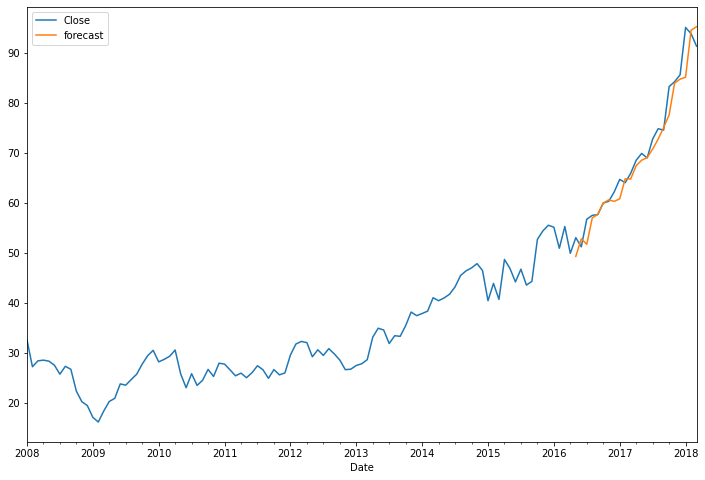

In [86]:
df['forecast'] = results.predict(start=100,end=123)
df[['Close','forecast']].plot(figsize=(12,8));
plt.savefig('forecast.png')

In [54]:
df.tail()

,Close,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,Seasonal Second Difference,forecast
Date,,,,,,,
2017-11-01,84.169998,0.989998,-7.700005,23.910000,0.649998,-5.720005,83.880752
2017-12-01,85.540001,1.370003,0.380005,23.400002,-0.509998,-1.159996,84.677379
2018-01-01,95.010002,9.470001,8.099998,30.360001,6.959999,7.469997,85.068321
2018-02-01,93.769997,-1.240005,-10.710007,29.789997,-0.570004,-7.530003,94.457667
2018-03-01,91.269997,-2.500000,-1.259995,25.409996,-4.380001,-3.809998,95.163815


In [55]:
from pandas.tseries.offsets import DateOffset

In [56]:
future_dates = [df.index[-1]+DateOffset(months=x) for x in range(1,24)]

In [57]:
future_dates

[Timestamp('2018-04-01 00:00:00'),
 Timestamp('2018-05-01 00:00:00'),
 Timestamp('2018-06-01 00:00:00'),
 Timestamp('2018-07-01 00:00:00'),
 Timestamp('2018-08-01 00:00:00'),
 Timestamp('2018-09-01 00:00:00'),
 Timestamp('2018-10-01 00:00:00'),
 Timestamp('2018-11-01 00:00:00'),
 Timestamp('2018-12-01 00:00:00'),
 Timestamp('2019-01-01 00:00:00'),
 Timestamp('2019-02-01 00:00:00'),
 Timestamp('2019-03-01 00:00:00'),
 Timestamp('2019-04-01 00:00:00'),
 Timestamp('2019-05-01 00:00:00'),
 Timestamp('2019-06-01 00:00:00'),
 Timestamp('2019-07-01 00:00:00'),
 Timestamp('2019-08-01 00:00:00'),
 Timestamp('2019-09-01 00:00:00'),
 Timestamp('2019-10-01 00:00:00'),
 Timestamp('2019-11-01 00:00:00'),
 Timestamp('2019-12-01 00:00:00'),
 Timestamp('2020-01-01 00:00:00'),
 Timestamp('2020-02-01 00:00:00')]

In [58]:
future_df = pd.DataFrame(index=future_dates,columns=df.columns)

In [59]:
future_df

,Close,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,Seasonal Second Difference,forecast
2018-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
final_df = pd.concat([df,future_df])

In [61]:
final_df.head()

,Close,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,Seasonal Second Difference,forecast
2008-01-01,32.599998,NaN,NaN,NaN,NaN,NaN,NaN
2008-02-01,27.200001,-5.399998,NaN,NaN,NaN,NaN,NaN
2008-03-01,28.379999,1.179998,6.579996,NaN,NaN,NaN,NaN
2008-04-01,28.52,0.140001,-1.039997,NaN,NaN,NaN,NaN
2008-05-01,28.32,-0.200001,-0.340002,NaN,NaN,NaN,NaN


In [62]:
final_df.tail()

,Close,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,Seasonal Second Difference,forecast
2019-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
final_df.shape

(146, 7)

In [64]:
final_df['forecast'] = results.predict(start=122,end=146)

In [65]:
final_df.tail()

,Close,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,Seasonal Second Difference,forecast
2019-10-01,NaN,NaN,NaN,NaN,NaN,NaN,111.628291
2019-11-01,NaN,NaN,NaN,NaN,NaN,NaN,112.377518
2019-12-01,NaN,NaN,NaN,NaN,NaN,NaN,113.281159
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,116.056720
2020-02-01,NaN,NaN,NaN,NaN,NaN,NaN,115.289016


<AxesSubplot:>

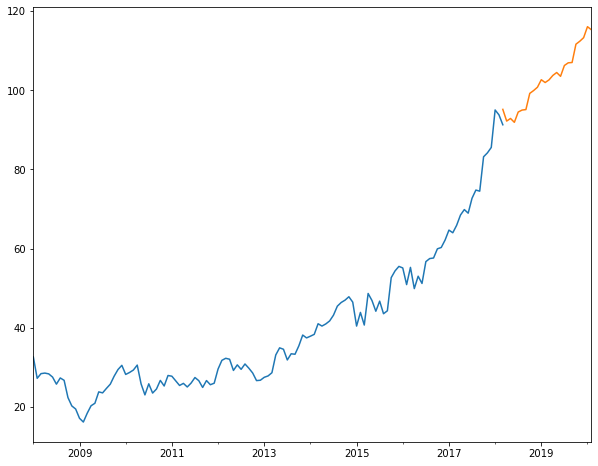

In [66]:
final_df['Close'].plot(figsize=(10,8))
final_df['forecast'].plot()

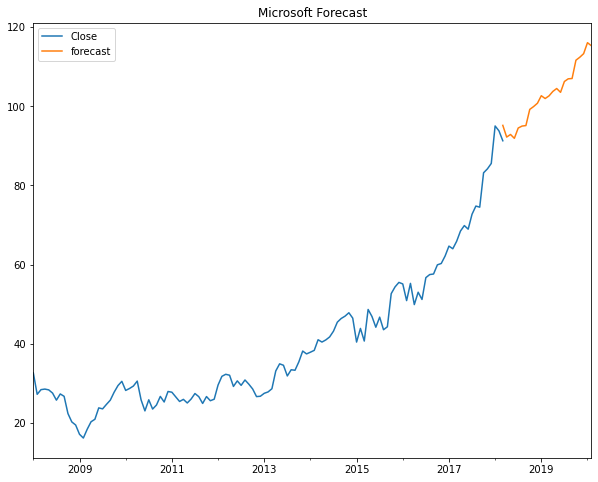

In [90]:
final_df[['Close','forecast']].plot(figsize=(10,8));
plt.title('Microsoft Forecast')
plt.savefig('future_forecast_MSFT.png')

In [68]:
open_price = df['Close'][-1]
open_price

91.2699966430664

In [91]:
no_of_shares = 300000/open_price
no_of_shares

3286.9509261978305

In [92]:
final_price=final_df['forecast'][-1]
final_price

115.28901592135179

In [93]:
price_diff = final_price-open_price
price_diff

24.019019278285384

In [94]:
P_L = price_diff*no_of_shares
P_L

78949.33766312369